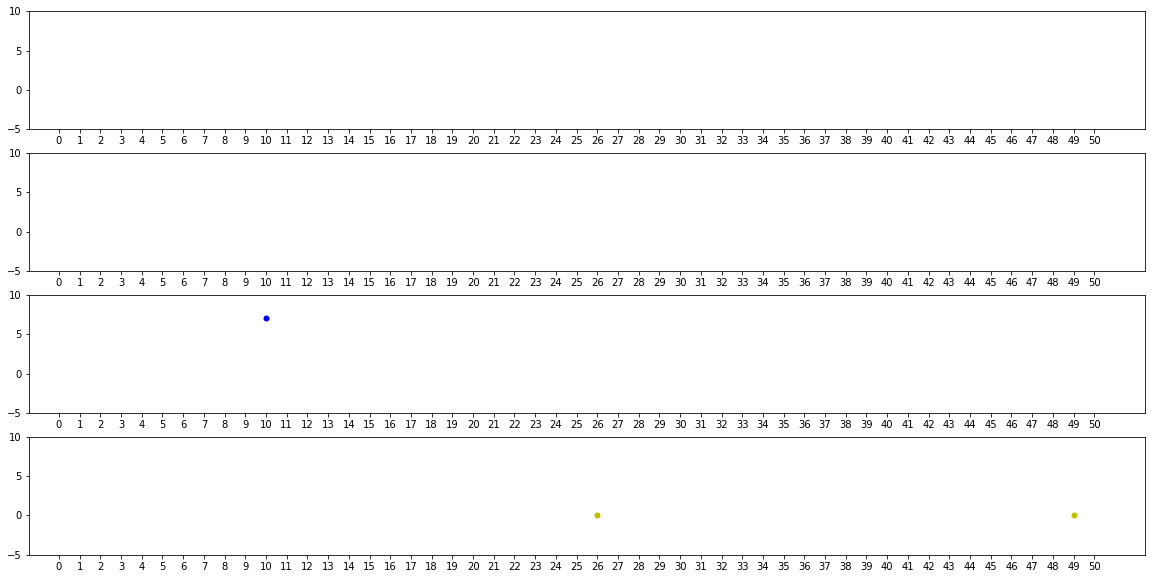

In [55]:
import numpy as np
import matplotlib.pyplot as plt
vols = np.load("/data/FLARE21/val1_oar_volumes.npy")
fig, (ax0,ax1,ax2,ax3)  = plt.subplots(nrows=4, figsize=(20,10))
for ordx, (c, ax) in enumerate(zip(['r','g','b','y'],(ax0,ax1,ax2,ax3))):
    ax.scatter(np.arange(1,51,1), vols[:,ordx], c=c, linewidth=0)
    ax.set_ylim(-5,10)
    ax.set_xticks(np.arange(0,51,1))
plt.show()

In [73]:
import os
import numpy as np
import matplotlib
import SimpleITK as sitk
from roughSeg.utils import getFiles, windowLevelNormalize
im_dir = "/data/FLARE21/validation_data/ValidationImg/"
seg_dir = "/data/FLARE21/RRR_MCRVal1/"
patient = "validation_026.nii.gz"
segs = sitk.ReadImage(os.path.join(seg_dir, patient))
ct  = sitk.ReadImage(os.path.join(im_dir, patient.replace('.nii', '_0000.nii')))

segs = sitk.GetArrayFromImage(segs).astype(float)
ct = sitk.GetArrayFromImage(ct)
print(ct.min(), ct.max())
ct = windowLevelNormalize(ct, level=50, window=400)
print(ct.min(), ct.max())
print(segs.shape)
segs[segs==0] = np.nan


-1024.0 2976.0
0.0 1.0
(565, 512, 512)


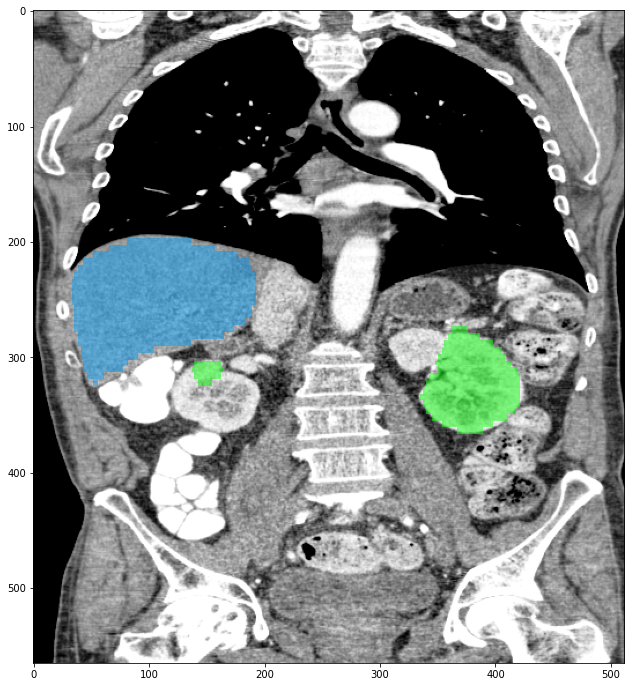

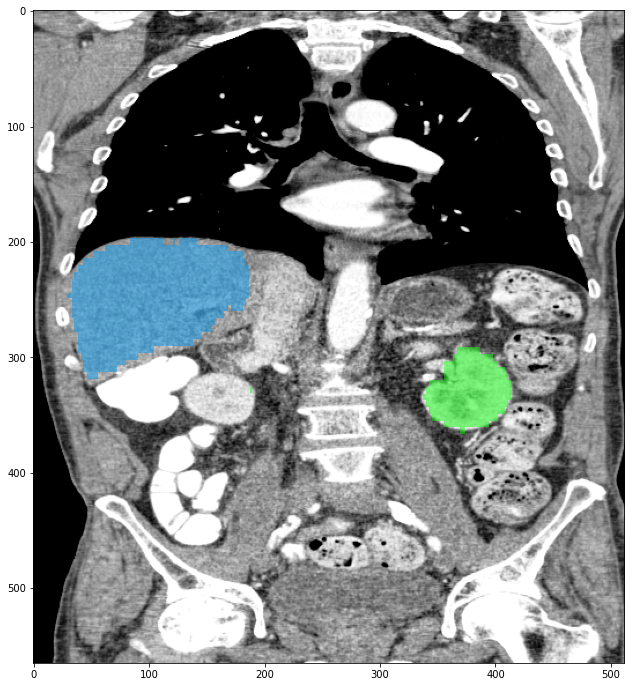

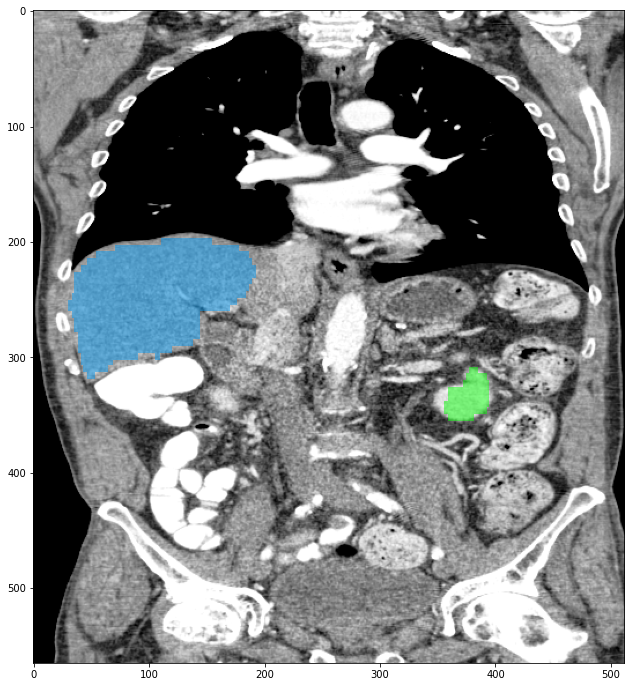

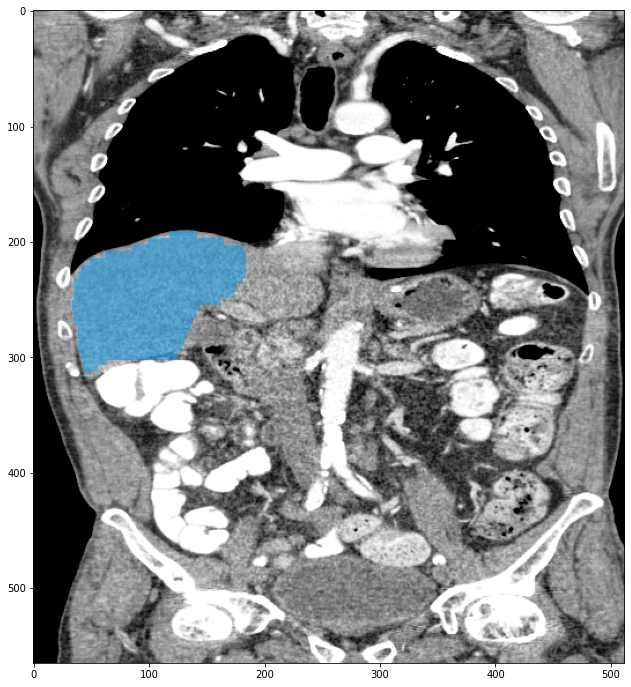

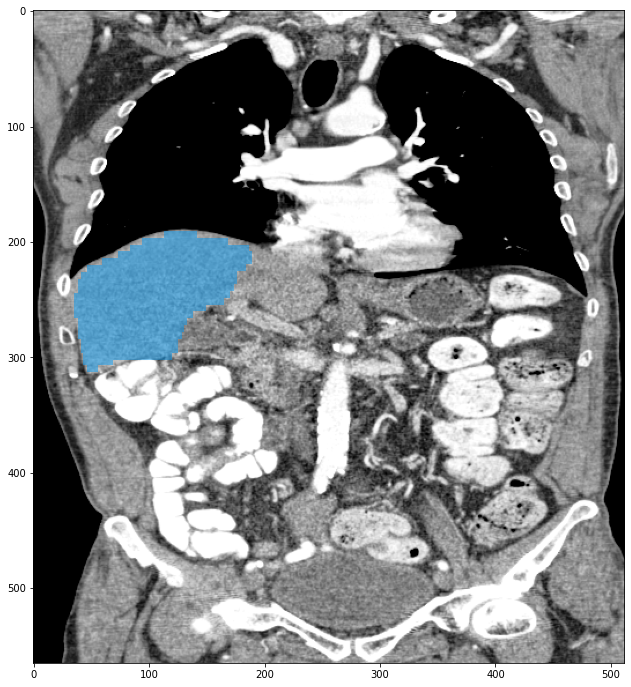

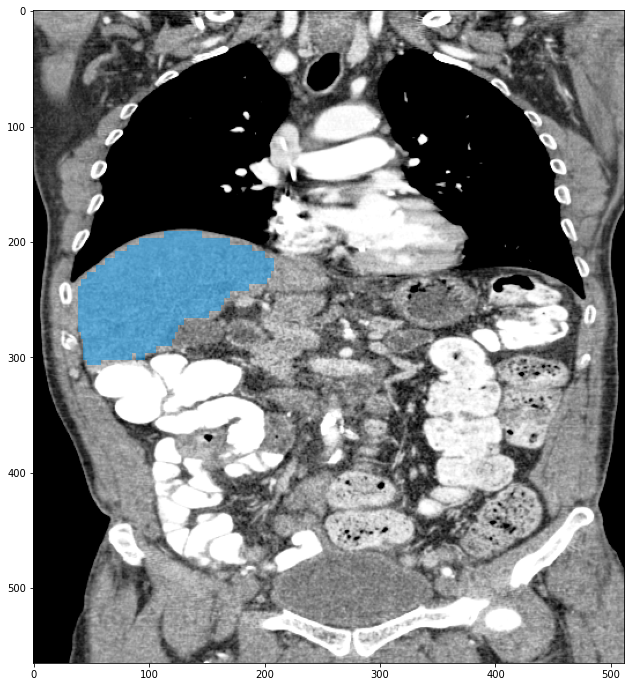

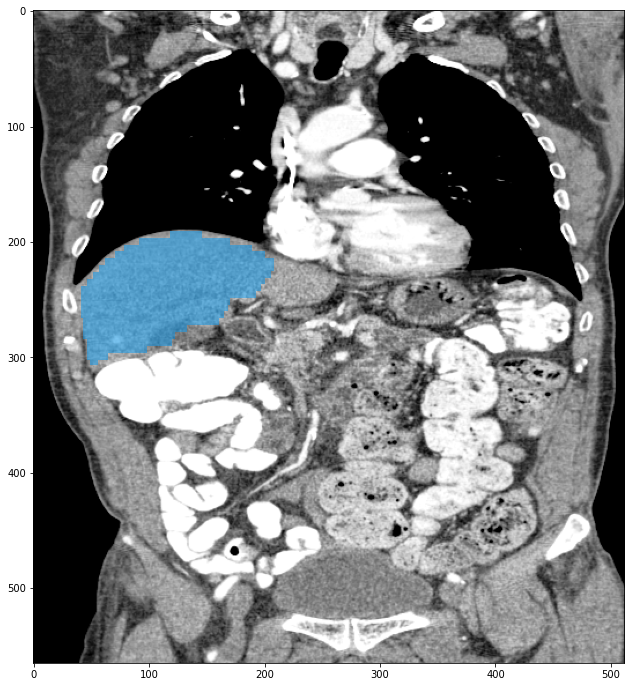

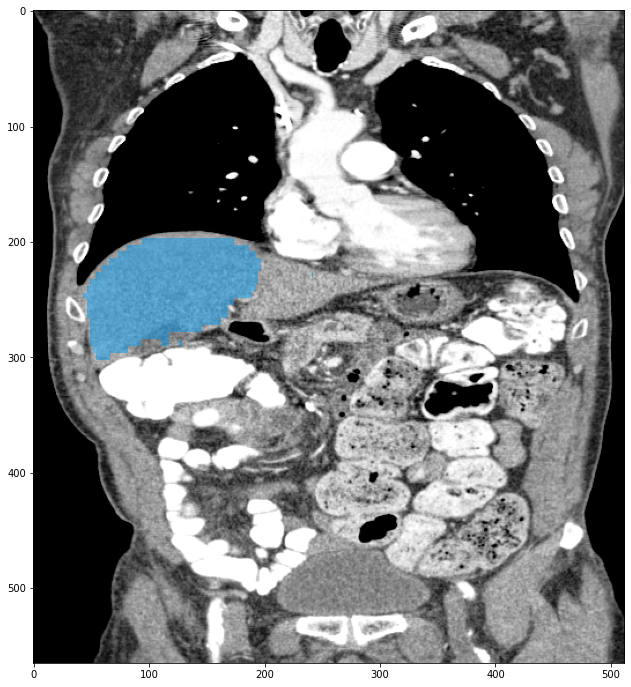

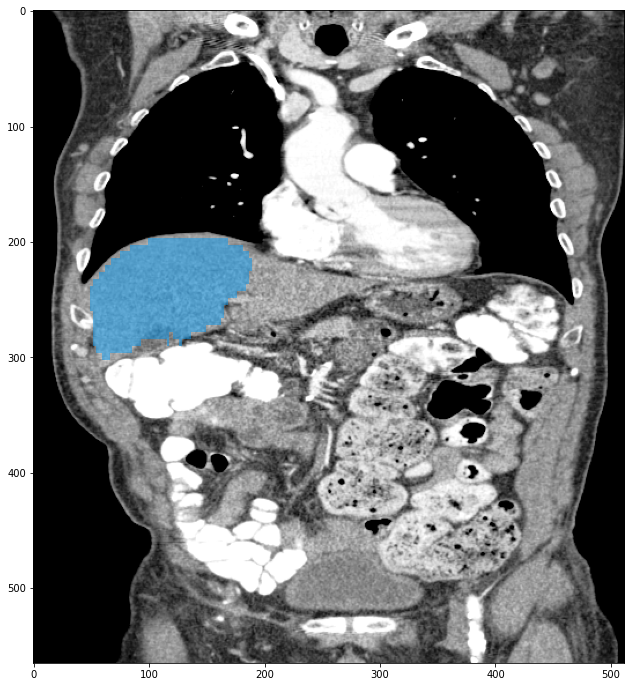

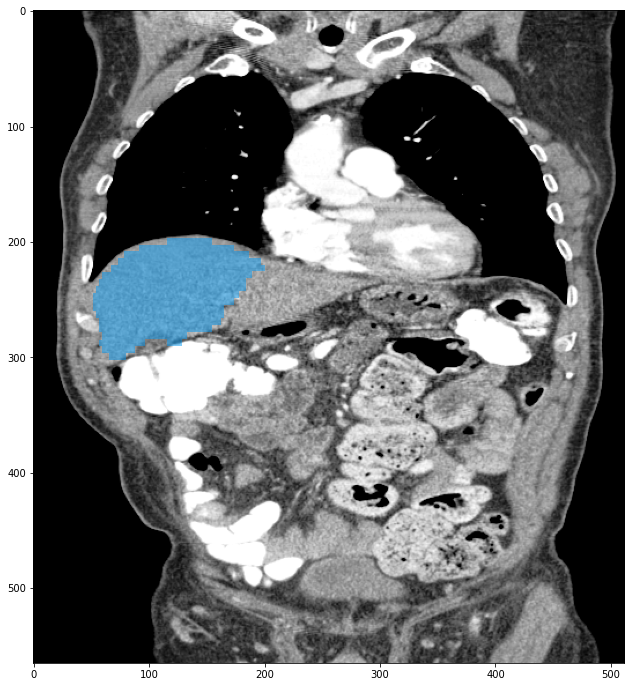

In [76]:
for slice_idx in range(220, 320, 10):
    fig, ax = plt.subplots(figsize=(12,12))
    cmap = matplotlib.colors.ListedColormap(["black", "xkcd:azure", "xkcd:neon green", "xkcd:goldenrod", "xkcd:neon pink"])
    ax.imshow(np.rot90(ct[:,slice_idx],2), cmap="Greys_r")#, vmin=0, vmax=1)
    ax.imshow(np.rot90(segs[:,slice_idx],2), cmap=cmap, vmin=0, vmax=4, alpha=0.5)
    plt.show()